In [181]:
# Importing Relevant Libraries

import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Machine Learning Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, KFold

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve

import joblib

# Show all columns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [138]:
# Importing the dataset

df = pd.read_csv('loan_approval_dataset.csv')
print("Shape of the dataset: ", df.shape)
df.head()

Shape of the dataset:  (4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


**We have loaded the dataset, which contains a total of 4269 records and 13 columns. Although most column has numerical values, this does not imply that all variables are numerical. For example, the column `no_of_dependants` has values 0 to 5, representing categories. Thus, our dataset is a mix of categorical and numerical variables. We need to determine which columns are numerical and which are categorical by examining the definitions of each column.**

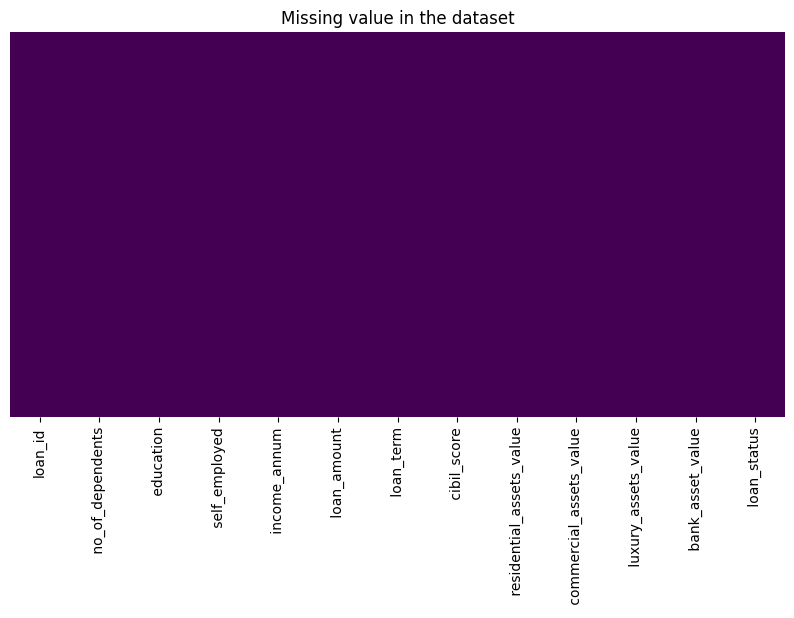

In [139]:
# Plotting the missing values

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing value in the dataset')
plt.show()

**This plot is a visual representation of the missing values, where purple indicates present values and yellow indicates missing values. It provides a clear view of the distribution of missing values across the dataset on a row-wise basis. Since there are no yellow spots meaning there is no null values**

In [140]:
# dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


**In the dataset information, we can see that 3 columns have object datatype, ten has integer datatype and none has float datatype.We can also see  that no columns has any missing values.**

In [141]:
# Remove space from the column names

df.columns = df.columns.str.replace(' ', '')

**All the columns except `loan_id` have a space character in thier name, removing it will make it easy to reference them**

In [142]:
# Defining numerical and categorical columns

categorical_cols = ['no_of_dependents','education','self_employed','loan_term','loan_status']
numerical_cols = df.columns.difference(categorical_cols).tolist()

print("Number of Categorical Columns: ", len(categorical_cols))
print("Number of Numerical Columns: ", len(numerical_cols))


Number of Categorical Columns:  5
Number of Numerical Columns:  8


**Now we will start the exploratory data analysis. The first step is defining the categorical and numerical variables. Variables such as `no_of_dependents`,`education`,`self_employed`,`loan_term`,`loan_status` are classified as categorical variables. In contrast, any other variables that are not part of catergorical variables are classified as numerical variables i.e., `bank_asset_value`.`cibil_score`,`commercial_assets_value` etc.**

In [143]:
# Data description of numerical columns

df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0


**In the dataset description, we can see the numerical variables' descriptive analysis, including statistics like mean, standard deviation, minimum value, maximum value, and median values. There are no missing values. We can observe that the ranges of the columns are different, which may require scaling before using any ML model.**

In [144]:
# Data properties for categorical columns

for col in categorical_cols:
    print(f'Column: {col} | Number of unique values: {df[col].nunique()}')

Column: no_of_dependents | Number of unique values: 6
Column: education | Number of unique values: 2
Column: self_employed | Number of unique values: 2
Column: loan_term | Number of unique values: 10
Column: loan_status | Number of unique values: 2


**For the categorical variables, we have identified the number of unique values. Most columns are binary, containing either 0 or 1 as values. However, the `no_of_dependents` variable has six distinct categories. Whereas `loan_term` has ten unique values.**

In [145]:
# Checking if loan_id is unique for each record

print(f'Number of rows in the dataset: {df.shape[0]}')
print(f'Number of unique loan IDs: {df["loan_id"].nunique()}')

Number of rows in the dataset: 4269
Number of unique loan IDs: 4269


**Now we have checked if each record in `loan_id` is unique or not. As we can see we have a total records of 4269 and our unique values are also 4269 ensuring each record is unique**

In [146]:
## Dropping the columns CustomerId, RowNumber and Surname

df.drop(['loan_id'], axis=1, inplace=True)
numerical_cols.remove("loan_id")
df.shape

(4269, 12)

**We have dropped columns `loan_id` as it has too many unqiue values in it to encode effectively and using it as it is or even after encoding will effect the performance of the model for worse.**

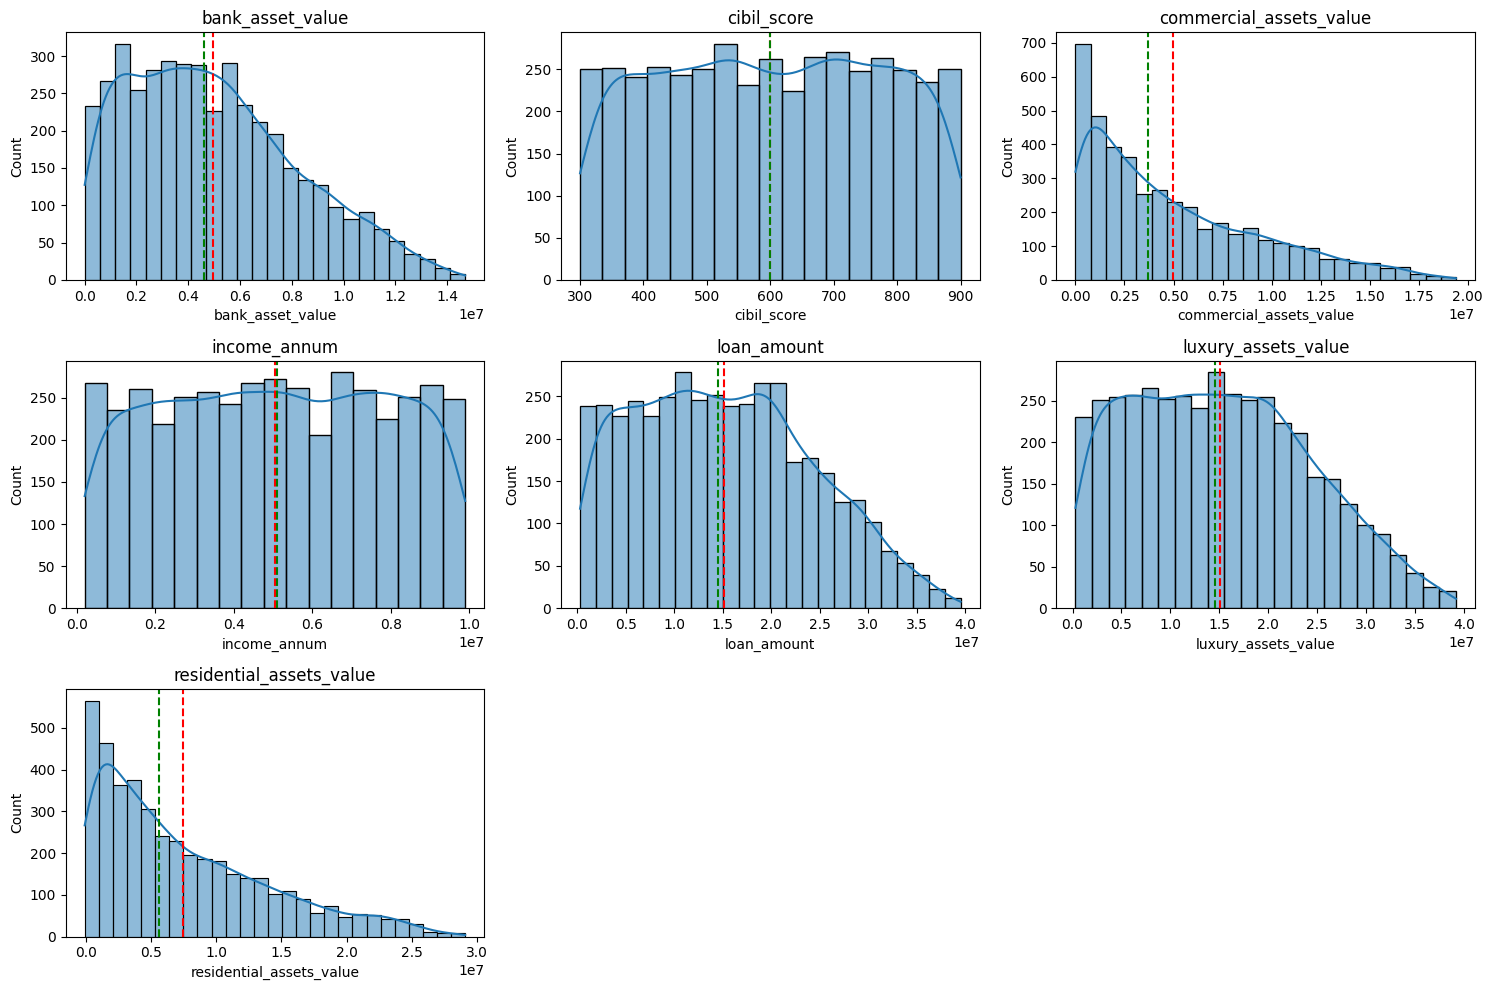

In [147]:
## Plotting distribution of numerical columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='mean')
    plt.axvline(df[col].median(), color='green', linestyle='--', label='median')
plt.tight_layout()
plt.show()

**This plot illustrates the distribution of several numerical variables. Most columns, such as asset and loan-related features, exhibit right-skewed distributions, with the mean being pulled higher by a few extreme values. However, the `cibil_score` and `income_annum` shows a more uniform distribution, with closely aligned mean and median values**

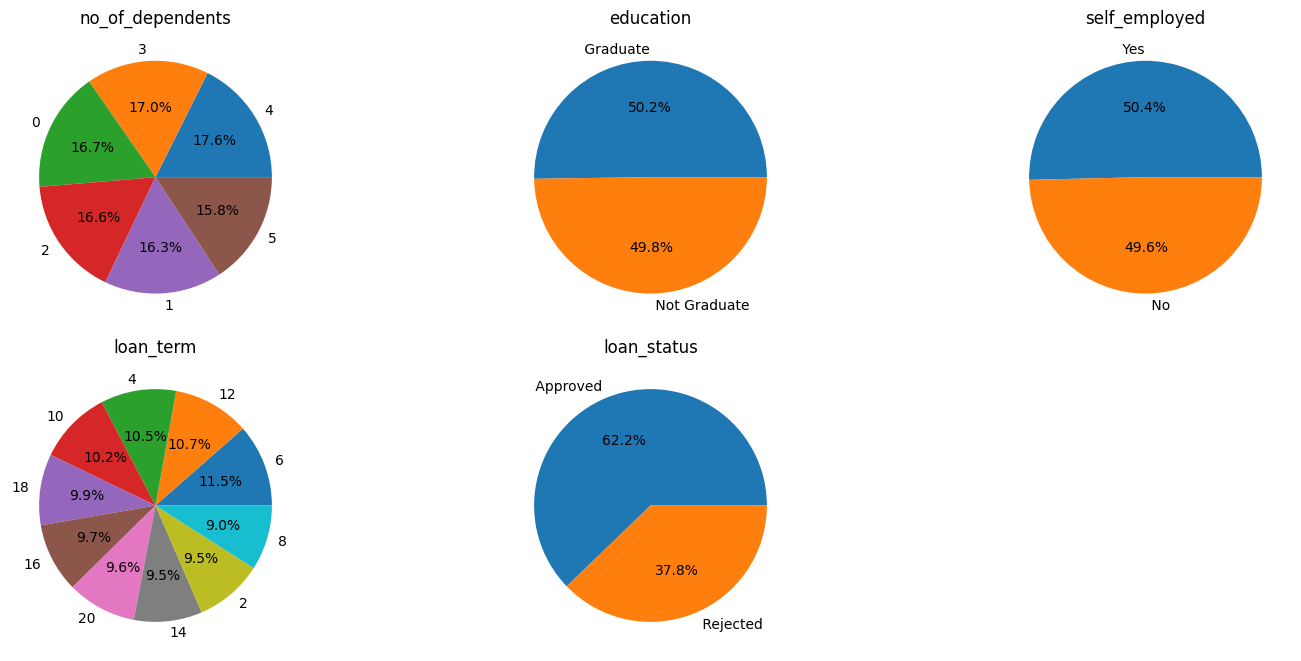

In [148]:
## Plotting the distribution of categorical columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

**Similarly, this plot illustrates the distribution of categorical values, showing the percentage of different values in each categorical column. It reveals that `education` and `self_employed` are evenly distributed, with nearly equal proportions in each category. The `no_of_dependents` and `loan_term` columns also exhibit relatively balanced distributions across their categories. However, the `loan_status` column shows a skewed distribution, with a higher proportion of loans being approved.**

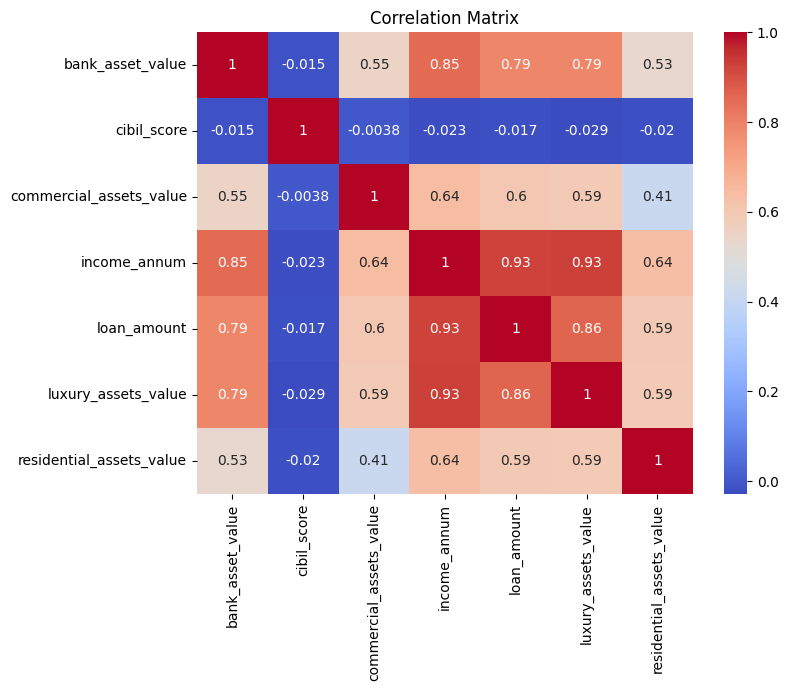

In [149]:
## Plotting the correlation matrix for numerical columns

plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**The correlation matrix represents the relationships between the numerical features. We observe strong positive correlations between several features. Notably, `income_annum` shows a high positive correlation with `loan_amount` (0.93) and `luxury_assets_value` (0.93). Similarly, `bank_asset_value` has a strong correlation with `income_annum` (0.85). On the other hand, `cibil_score` shows very weak or no correlation with other variables.**

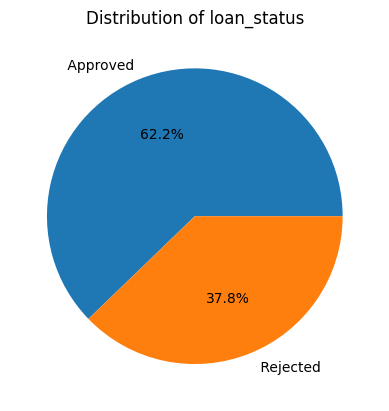

In [150]:
## Distribution of the target variable

target = 'loan_status'
df[target].value_counts().plot.pie(autopct='%1.1f%%')
plt.title(f'Distribution of {target}')
plt.ylabel('')
plt.show()

**The pie chart above illustrates the distribution of the target variable, `loan_status`. It shows that 62.8% of values are Approved, indicating loans that  have been approved, while 37.8% of values are Rejected, indicating loans that have not been approved. This highlights a somewhat imbalance in the dataset but its not significant to cause any inconvenience in the model performace.**

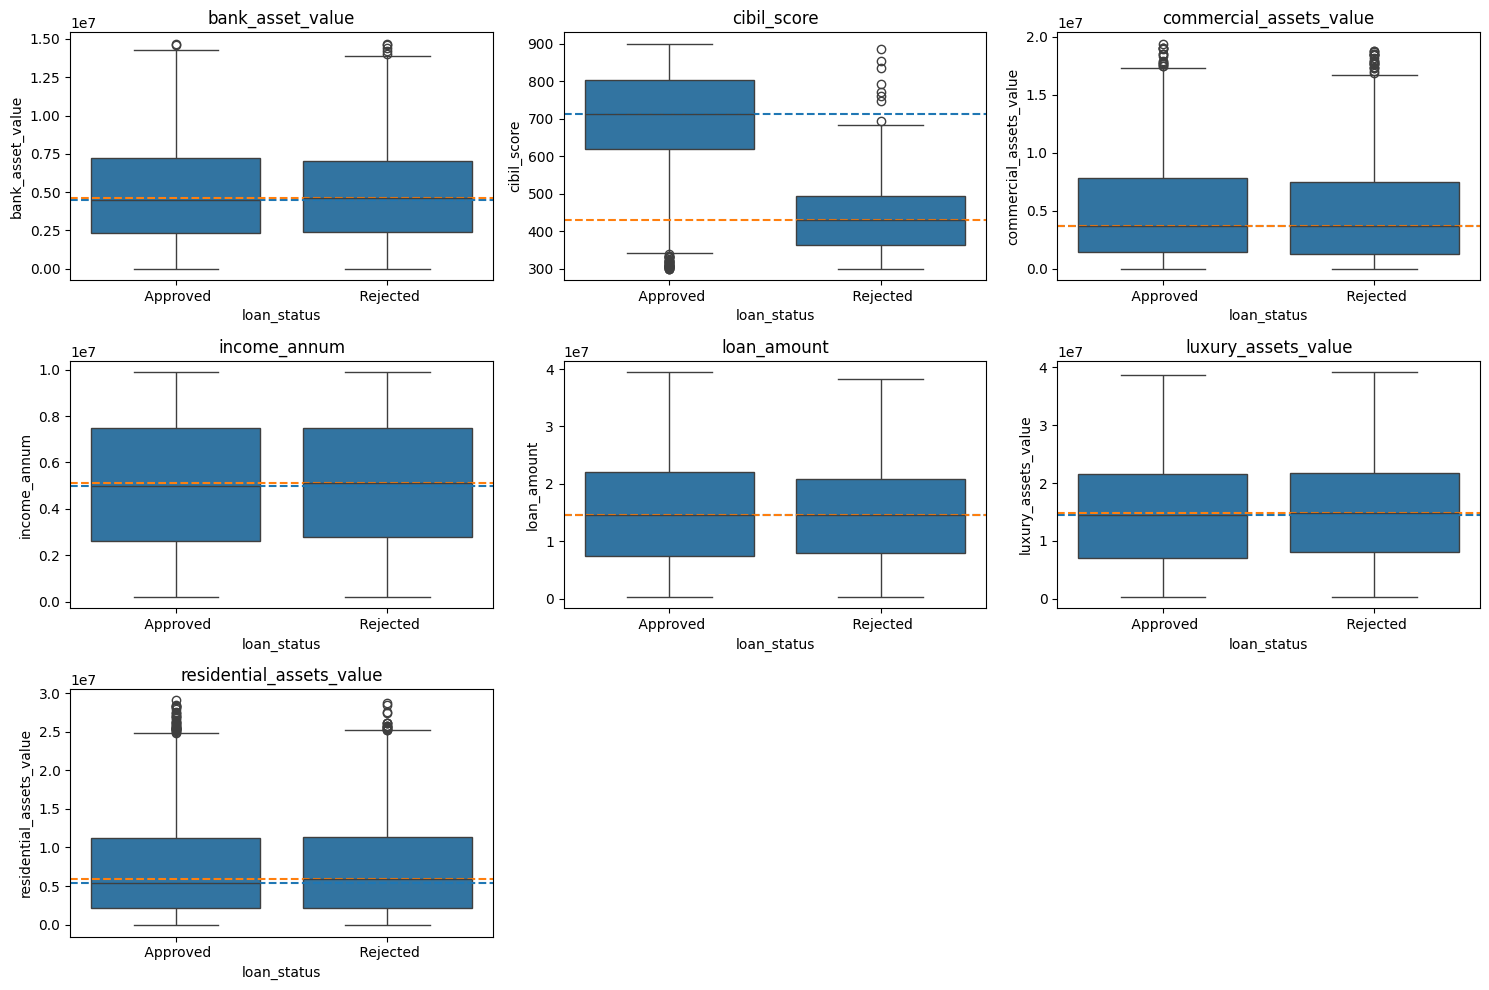

In [178]:
# Difference of distribution of numerical columns based on the target variable

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=target, y=col, data=df)
    plt.title(col)
    # Adding median lines with the same color as the boxplot
    for j, class_name in enumerate(df[target].unique()):
        line = plt.axhline(df[df[target] == class_name][col].median(), color=sns.color_palette()[j], linestyle='--', label=f'{class_name} median')
plt.tight_layout()
plt.show()

**These subplots display the distribution of numerical columns when the class is Approved versus when the class is Rejected. We observe significant differences in only one numerical values between the two classes, while others show minimal variation. For instance, the column like `cibil_score` exhibit notable differences between the two classes. Conversely, columns such as `ban_asset_value`  , `income_anum` and `residential_assets_value` show very little variation across the classes.We can also see that column `commercial_assets_value` , `loan_amount` and `luxury_asset_value` has no difference at all.**

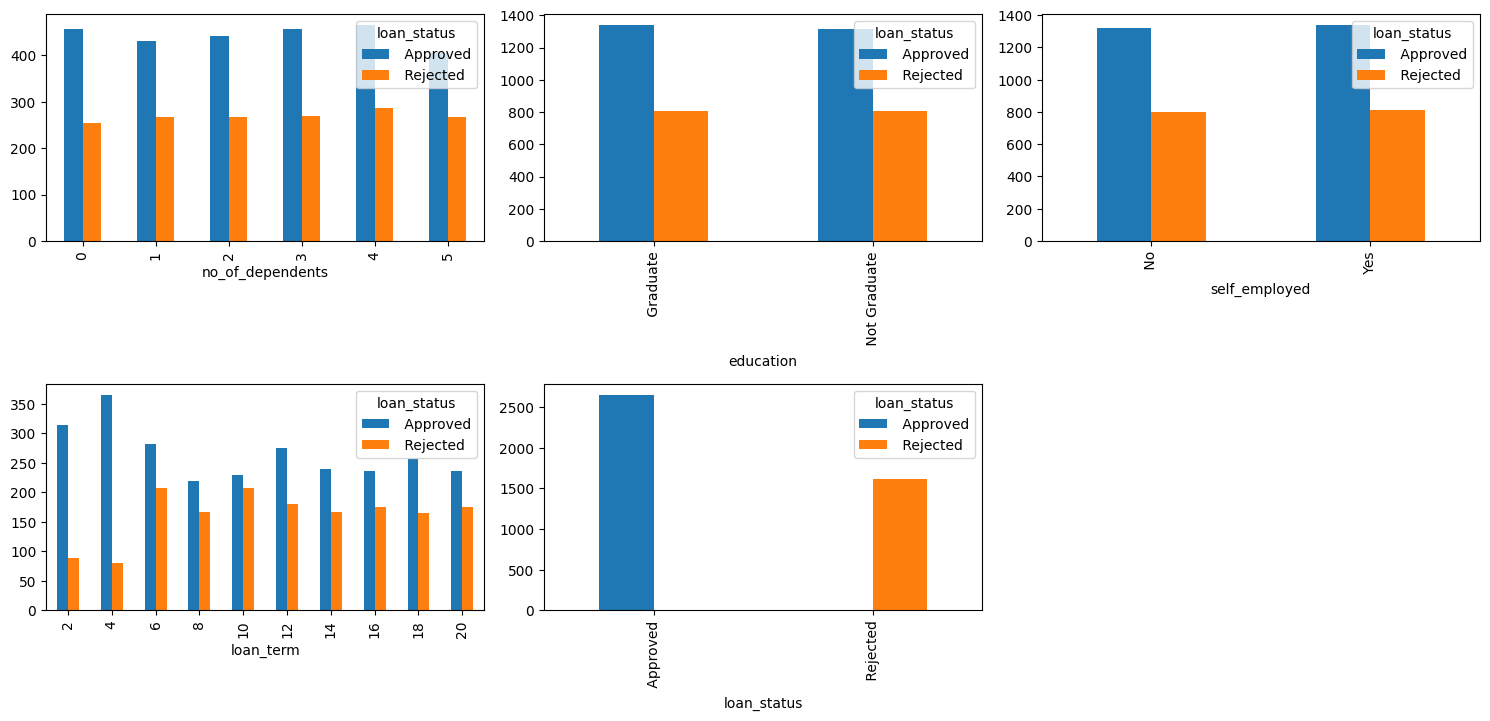

In [152]:
## Difference of distribution of categorical columns based on the target variable

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    pd.crosstab(df[col], df[target]).plot(kind='bar', stacked=False, ax=plt.gca())
    plt.ylabel('')
plt.tight_layout()
plt.show()

**Similarly, these subplots illustrate the distribution of categorical columns when the target variable `loan_status` is Approved versus when it is Rejected. We observe similarities in behavior across both classes in many cases, but there are also noticeable differences.**

In [153]:
# Defining the features and target variable

X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (4269, 11)
Target shape: (4269,)


**Now we will start the data pre-processing. Before proceeding, we need to define the features and the target variable for the analysis. `loan_status` has been removed from the features (X) as it is our target variable.**

In [154]:
# Splitting the dataset into training,testing and validation set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print(f'Training set shape: {X_train.shape} | {y_train.shape}')
print(f'Testing set shape: {X_test.shape} | {y_test.shape}')
print(f'Validation set shape: {X_val.shape} | {y_val.shape}')

Training set shape: (2732, 11) | (2732,)
Testing set shape: (854, 11) | (854,)
Validation set shape: (683, 11) | (683,)


**Before proceeding with feature selection, we will split the dataset into training, testing, and cross-validation sets. This approach ensures that feature selection is based exclusively on the training data. The cross-validation set will help tune model parameters, and the test set will be reserved for final evaluation, ensuring unbiased model assessment.**

In [155]:
## Encoding the categorical columns and target variable

# label encoding the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

# Convert the categorical columns to object type
categorical_cols.remove('loan_status')
X_train[categorical_cols] = X_train[categorical_cols].astype('object')
X_val[categorical_cols] = X_val[categorical_cols].astype('object')
X_test[categorical_cols] = X_test[categorical_cols].astype('object')

X_train = pd.get_dummies(X_train, drop_first=True)
print(f'Train Features shape after encoding: {X_train.shape}')

X_val = pd.get_dummies(X_val, drop_first=True)
print(f'Validation Features shape after encoding: {X_val.shape}')

X_test = pd.get_dummies(X_test, drop_first=True)
print(f'Test Features shape after encoding: {X_test.shape}')

Train Features shape after encoding: (2732, 23)
Validation Features shape after encoding: (683, 23)
Test Features shape after encoding: (854, 23)


**After defining the features and target in all three sets of data , we transform our categorical values into objects so that 0 and 1 are represented as classes rather than numerical values. Subsequently, we apply one-hot encoding to transform them into numerical format. This ensures each category has 2735,683 and 854 records in train,validation and test sets repectively. Since two columns had more than two unique values i.e, `loan_term` had 10 and `no_of_dependents` had 6, there is a substantial increase in the number of columns, resulting in an additional column after one-hot encoding. Thus, we now have 23 columns in all sets.**

**This Step is done after splitting the data in different sets to prevent data leakage.**

In [156]:
# Scaling the numerical columns

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_train.head()


,income_annum,loan_amount,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,no_of_dependents_1,no_of_dependents_2,no_of_dependents_3,no_of_dependents_4,no_of_dependents_5,education_ Not Graduate,self_employed_ Yes,loan_term_4,loan_term_6,loan_term_8,loan_term_10,loan_term_12,loan_term_14,loan_term_16,loan_term_18,loan_term_20
2978,-0.510461,-0.199243,-0.309508,0.237710,-0.315616,-0.127306,-0.629759,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
1395,-0.116735,-0.210420,-0.624724,-1.001946,-0.107569,-0.105281,0.455966,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2249,0.706513,0.672511,-0.262809,1.493057,0.377875,-0.050218,0.207800,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3288,-0.080941,-0.087480,-0.303670,0.473087,-0.985991,-0.578823,-0.784863,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False
3383,-0.939982,-0.914529,-0.788170,-0.860720,-0.847293,-0.611861,-0.939966,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False


**As observed earlier, the ranges of each column were different. To ensure that no single column has a disproportionate impact on the model, we need to scale all variables. This process equalizes the influence of each column in the modeling process.**

**This Step is done after splitting the data in different sets to prevent data leakage.**

In [157]:
# DataFrame to store the results

results = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Validation Accuracy','Train F1 Score',
                                'Validation F1 Score', 'Validation Precision', 'Validation Recall', 'Validation ROC AUC'])
results

,Model,Train Accuracy,Validation Accuracy,Train F1 Score,Validation F1 Score,Validation Precision,Validation Recall,Validation ROC AUC


**Now, that we are done with all the preprocessing steps we can start evaluating the different models. We have created a dataframe `results` to store the evaluation result of each model.**

In [158]:
# function to search for the best hyperparameters

def search_best_hyperparameters(model, params, X_train, y_train):
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f'Best Parameters: {grid.best_params_}')
    print(f'Best Score: {np.round(grid.best_score_, 2)}')
    print(f'Best Estimator: {grid.best_estimator_}')
    return grid.best_estimator_

**This function helps us find the best combination or optimal parameters for a particular model using GridSearch.**

**GridSearch is a technique that performs an exhaustive search over a predefined parameter grid, training the model for each combination of hyperparameters and evaluating performance using cross-validation to identify the optimal set.**

In [159]:
# function to evaluate the model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    test_roc_auc = roc_auc_score(y_test, y_test_pred)
    
    return train_accuracy, test_accuracy, train_f1, test_f1, test_precision, test_recall, test_roc_auc

**This function helps us train and evaluate the particular model with best combination or optimal parameters for that particular model obtained using GridSearch.**

In [160]:
# Logistic Regression - Hyperparameter Tuning 

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

print('Logistic Regression')
lr = LogisticRegression(random_state=42)
lr_best = search_best_hyperparameters(lr, params, X_train, y_train)


Logistic Regression
Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.94
Best Estimator: LogisticRegression(C=1, random_state=42)


Logistic Regression


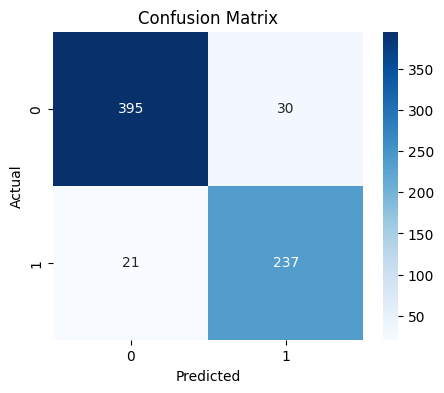

,Model,Train Accuracy,Validation Accuracy,Train F1 Score,Validation F1 Score,Validation Precision,Validation Recall,Validation ROC AUC
0,Logistic Regression,0.946559,0.925329,0.929126,0.902857,0.88764,0.918605,0.924008


In [161]:
# Logistic Regression - Evaluation

print('Logistic Regression')
results.loc[len(results)] = ['Logistic Regression'] + list(evaluate_model(lr_best, X_train, y_train, X_val, y_val))

results[results['Model'] == 'Logistic Regression']

In [162]:
# K-Nearest Neighbors - Hyperparameter Tuning

params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

print('K-Nearest Neighbors')
knn = KNeighborsClassifier()
knn_best = search_best_hyperparameters(knn, params, X_train, y_train)


K-Nearest Neighbors
Best Parameters: {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Best Score: 0.91
Best Estimator: KNeighborsClassifier(n_neighbors=11, weights='distance')


K-Nearest Neighbors


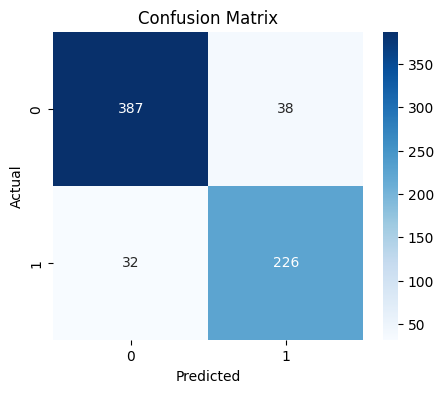

,Model,Train Accuracy,Validation Accuracy,Train F1 Score,Validation F1 Score,Validation Precision,Validation Recall,Validation ROC AUC
1,K-Nearest Neighbors,1.0,0.897511,1.0,0.8659,0.856061,0.875969,0.893279


In [163]:
# K-Nearest Neighbors - Evaluation

print('K-Nearest Neighbors')
results.loc[len(results)] = ['K-Nearest Neighbors'] + list(evaluate_model(knn_best, X_train, y_train, X_val, y_val))

results[results['Model'] == 'K-Nearest Neighbors']

In [164]:
# Decision Tree - Hyperparameter Tuning

params = {'max_depth': [3, 5, 7, 9, 11], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1,2,3,4,5]}

print('Decision Tree')
dt = DecisionTreeClassifier(random_state=42)
dt_best = search_best_hyperparameters(dt, params, X_train, y_train)


Decision Tree
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.96
Best Estimator: DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)


Decision Tree


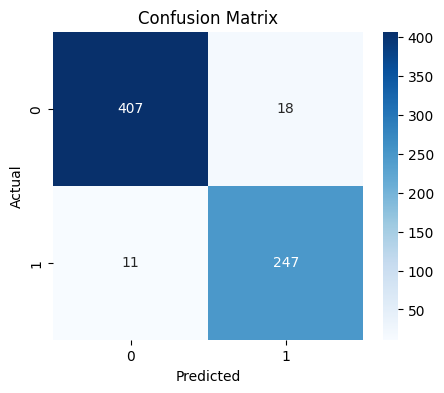

,Model,Train Accuracy,Validation Accuracy,Train F1 Score,Validation F1 Score,Validation Precision,Validation Recall,Validation ROC AUC
2,Decision Tree,0.965227,0.95754,0.954128,0.944551,0.932075,0.957364,0.957506


In [165]:
# Decision Tree - Evaluation

print('Decision Tree')
results.loc[len(results)] = ['Decision Tree'] + list(evaluate_model(dt_best, X_train, y_train, X_val, y_val))

results[results['Model'] == 'Decision Tree']


In [166]:
# Random Forest - Hyperparameter Tuning

params = {'n_estimators': [100, 250, 500], 'max_depth': [3, 7, 9], 'min_samples_split': [2, 4, 6]}

print('Random Forest')
rf = RandomForestClassifier(random_state=42)
rf_best = search_best_hyperparameters(rf, params, X_train, y_train)

Random Forest
Best Parameters: {'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.97
Best Estimator: RandomForestClassifier(max_depth=9, random_state=42)


Random Forest


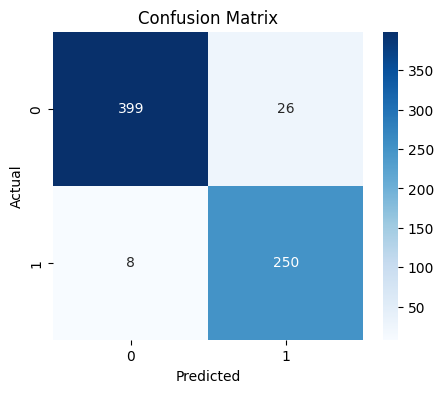

,Model,Train Accuracy,Validation Accuracy,Train F1 Score,Validation F1 Score,Validation Precision,Validation Recall,Validation ROC AUC
3,Random Forest,0.981698,0.95022,0.976303,0.93633,0.905797,0.968992,0.953908


In [167]:
# Random Forest - Evaluation

print('Random Forest')
results.loc[len(results)] = ['Random Forest'] + list(evaluate_model(rf_best, X_train, y_train, X_val, y_val))

results[results['Model'] == 'Random Forest']

In [168]:
# SVM - Hyperparameter Tuning

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
print('SVM')
svm = SVC(random_state=42)
svm_best = search_best_hyperparameters(svm, params, X_train, y_train)



SVM
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.94
Best Estimator: SVC(C=10, random_state=42)


SVM


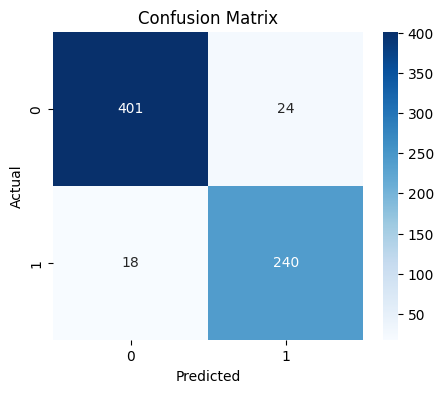

,Model,Train Accuracy,Validation Accuracy,Train F1 Score,Validation F1 Score,Validation Precision,Validation Recall,Validation ROC AUC
4,SVM,0.987189,0.938507,0.982985,0.91954,0.909091,0.930233,0.936881


In [169]:
# SVM - Evaluation

print('SVM')
results.loc[len(results)] = ['SVM'] + list(evaluate_model(svm_best, X_train, y_train, X_val, y_val))

results[results['Model'] == 'SVM']

In [170]:
# XGBoost - Hyperparameter Tuning

params = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [3, 5, 7, 9, 11], 'learning_rate': [0.001, 0.01, 0.1, 1]}
print('XGBoost')
xgb = XGBClassifier(random_state=42)
xgb_best = search_best_hyperparameters(xgb, params, X_train, y_train)


XGBoost
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400}
Best Score: 0.98
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


XGBoost


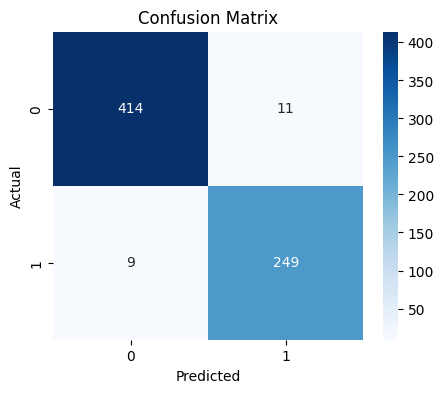

,Model,Train Accuracy,Validation Accuracy,Train F1 Score,Validation F1 Score,Validation Precision,Validation Recall,Validation ROC AUC
5,XGBoost,0.999268,0.970717,0.99903,0.96139,0.957692,0.965116,0.969617


In [171]:
# XGBoost - Evaluation

print('XGBoost')
results.loc[len(results)] = ['XGBoost'] + list(evaluate_model(xgb_best, X_train, y_train, X_val, y_val))

results[results['Model'] == 'XGBoost']

Naive Bayes


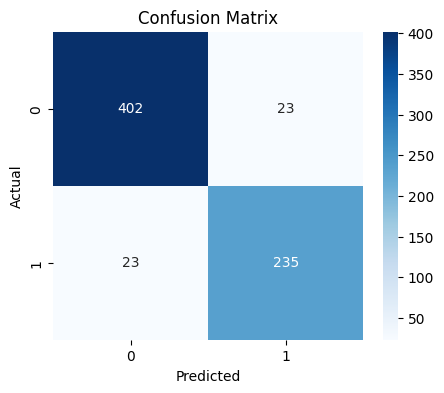

,Model,Train Accuracy,Validation Accuracy,Train F1 Score,Validation F1 Score,Validation Precision,Validation Recall,Validation ROC AUC
6,Naive Bayes,0.938507,0.93265,0.918367,0.910853,0.910853,0.910853,0.928368


In [172]:
# Naive Bayes - Evaluation

from sklearn.naive_bayes import GaussianNB

print('Naive Bayes')
nb = GaussianNB()
results.loc[len(results)] = ['Naive Bayes'] + list(evaluate_model(nb, X_train, y_train, X_val, y_val))

results[results['Model'] == 'Naive Bayes']


In [173]:
# Results

results

,Model,Train Accuracy,Validation Accuracy,Train F1 Score,Validation F1 Score,Validation Precision,Validation Recall,Validation ROC AUC
0,Logistic Regression,0.946559,0.925329,0.929126,0.902857,0.887640,0.918605,0.924008
1,K-Nearest Neighbors,1.000000,0.897511,1.000000,0.865900,0.856061,0.875969,0.893279
2,Decision Tree,0.965227,0.957540,0.954128,0.944551,0.932075,0.957364,0.957506
3,Random Forest,0.981698,0.950220,0.976303,0.936330,0.905797,0.968992,0.953908
4,SVM,0.987189,0.938507,0.982985,0.919540,0.909091,0.930233,0.936881
5,XGBoost,0.999268,0.970717,0.999030,0.961390,0.957692,0.965116,0.969617
6,Naive Bayes,0.938507,0.932650,0.918367,0.910853,0.910853,0.910853,0.928368


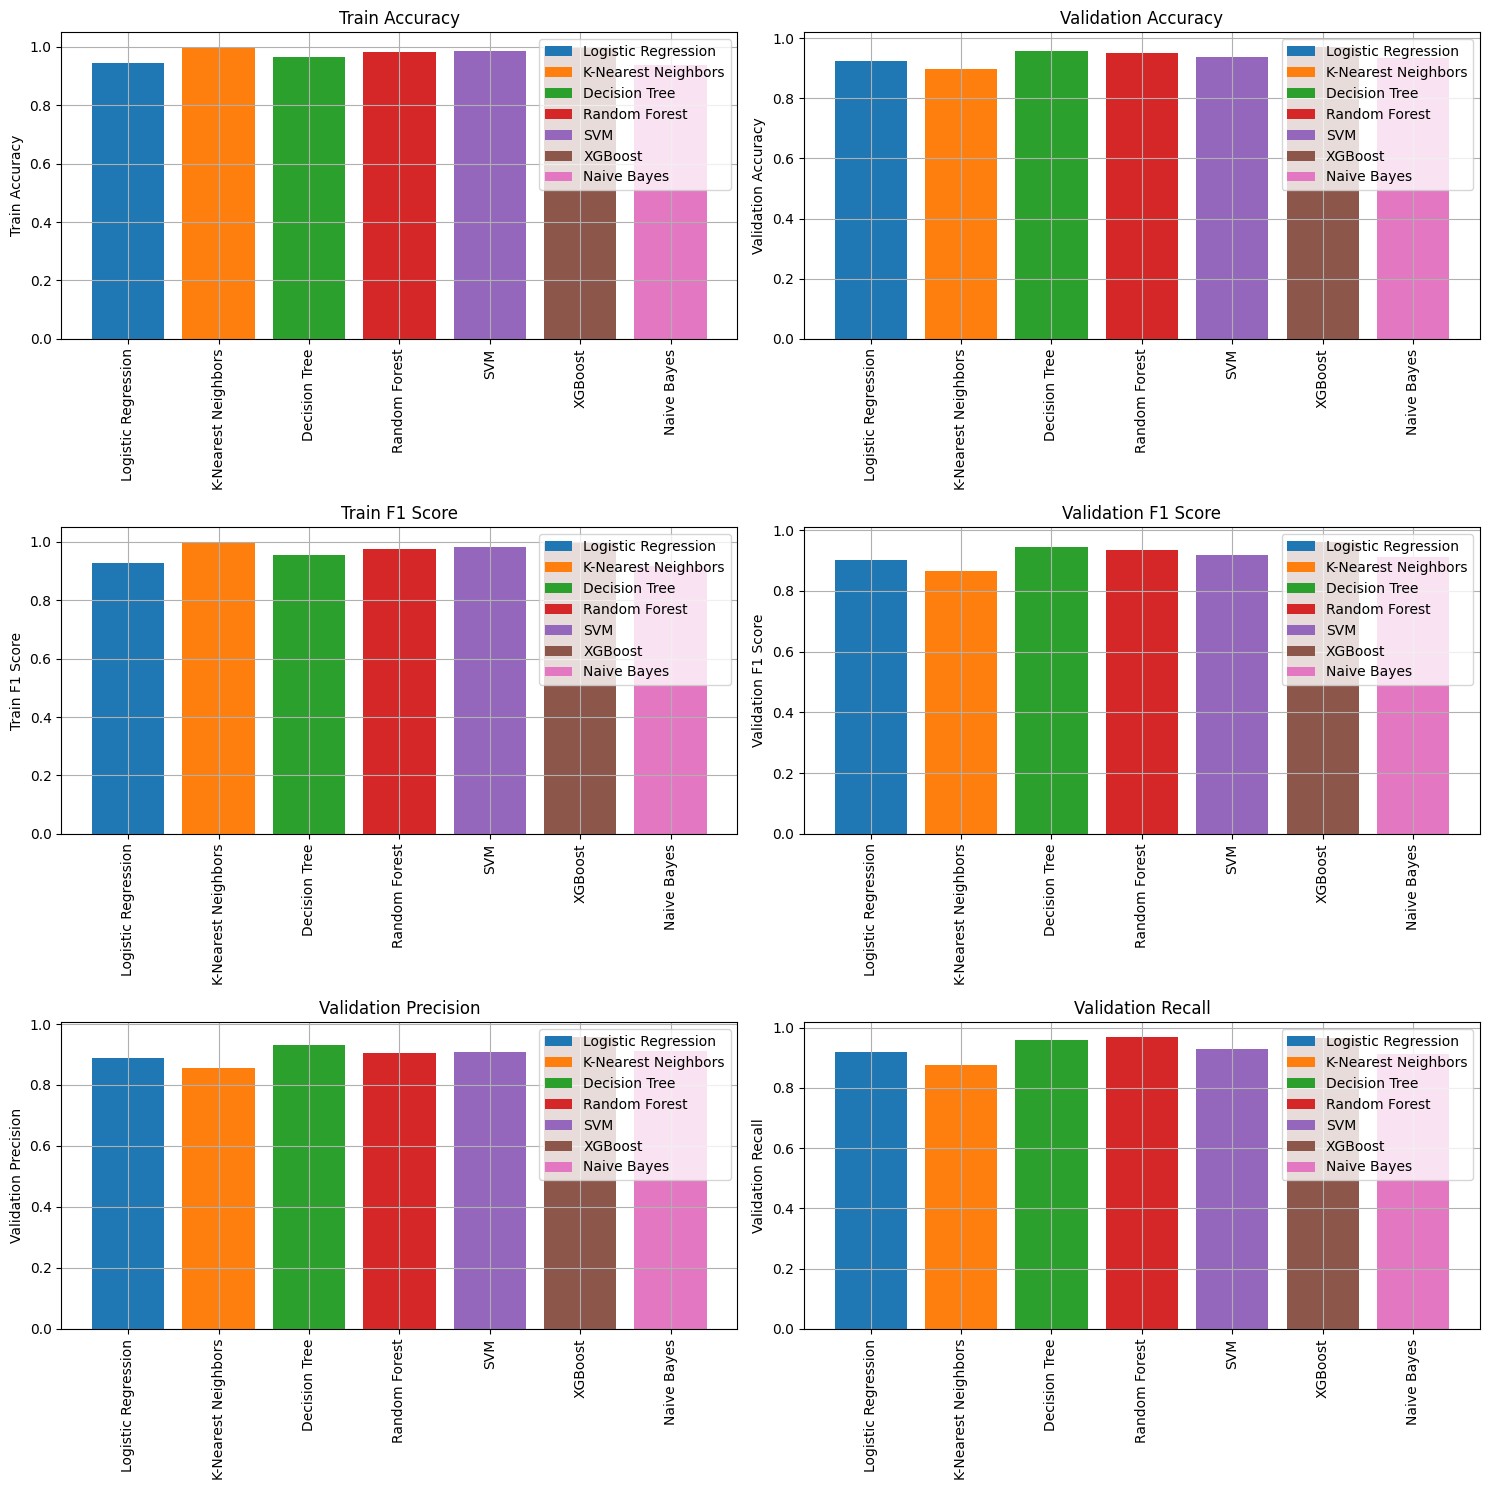

In [174]:
## Plot performance metrics for each model

# Create subplots for each performance metric
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

metrics = ['Train Accuracy', 'Validation Accuracy', 'Train F1 Score', 'Validation F1 Score', 'Validation Precision', 'Validation Recall']

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    for model in results['Model'].unique():
        model_data = results[results['Model'] == model]
        ax.bar(model, model_data[metric], label=model)
    
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=90)  # Rotate model names vertically
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


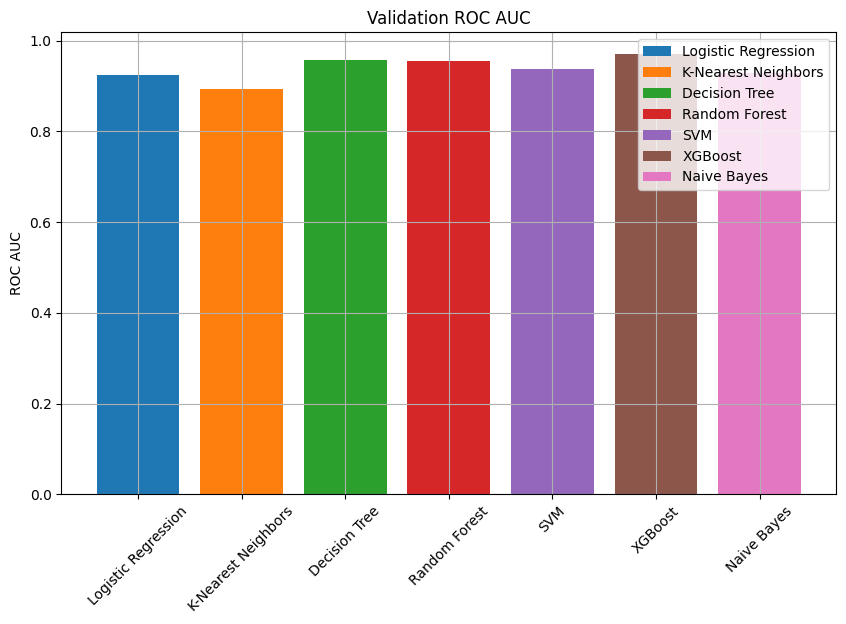

In [175]:
# Plot ROC Score for each model

plt.figure(figsize=(10, 6))
for model in results['Model'].unique():
    model_data = results[results['Model'] == model]
    plt.bar(model, model_data['Validation ROC AUC'], label=model)

plt.title('Validation ROC AUC')
plt.ylabel('ROC AUC')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [176]:
# Kfold Cross Validation

models = [lr_best, knn_best, dt_best, rf_best, svm_best, xgb_best]
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost']

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for model, model_name in zip(models, model_names):
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    print(f'{model_name} | Mean Accuracy: {np.round(cv_results.mean(), 2)} | Std: {np.round(cv_results.std(), 2)}')



Logistic Regression | Mean Accuracy: 0.94 | Std: 0.01
K-Nearest Neighbors | Mean Accuracy: 0.91 | Std: 0.01
Decision Tree | Mean Accuracy: 0.96 | Std: 0.01
Random Forest | Mean Accuracy: 0.96 | Std: 0.01
SVM | Mean Accuracy: 0.94 | Std: 0.01
XGBoost | Mean Accuracy: 0.98 | Std: 0.01


**In assessing the risk of lending money to individuals, prioritizing precision minimizes false positives, ensuring that most approved loans are good and reduce financial risk. Alternatively, focusing on recall minimizes false negatives, allowing more good loans to be approved, suitable for businesses aiming for rapid growth despite some risk. The final  choice depends on the organization's risk tolerance and long-term goals.**

**For this project we have prioritize precision in assessing the risk of lending money to individuals. This approach helps ensure that most approved loans are indeed good loans, thereby minimizing financial losses and maintaining the lender's reputation. Therefore we have choosen `XGBoost` as out best model as it has highest precision value.**

## Best Model - XGBOOST

Final Model Evaluation
Test Accuracy: 0.977751756440281
Test F1 Score: 0.9705426356589147
Test Precision: 0.9720496894409938
Test Recall: 0.9690402476780186
Test ROC AUC: 0.9760455475678229


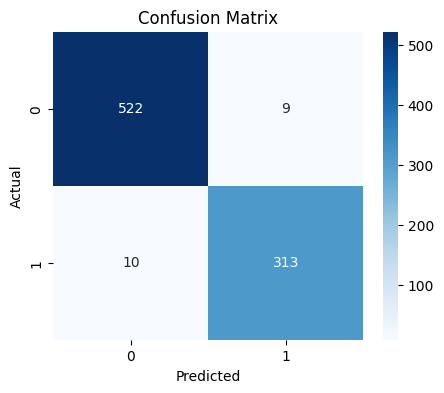

In [179]:
# Final Model - XGBoost

final_model = xgb_best
final_model.fit(X_train, y_train)

# Final Model Evaluation

y_test_pred = final_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print('Final Model Evaluation')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test F1 Score: {test_f1}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test ROC AUC: {test_roc_auc}')

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




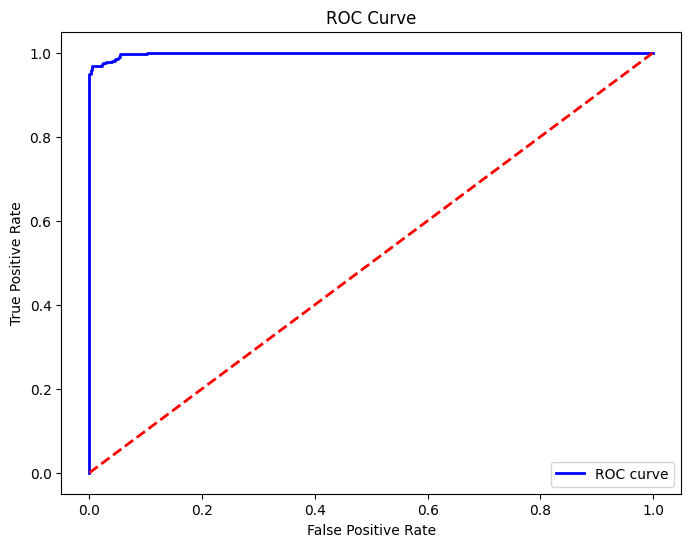

In [180]:
## Plotting the ROC Curve

# Get the probabilities for each class
y_test_probs = final_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [182]:
# Save the model

joblib.dump(final_model, 'loan_approval_model.pkl')

['loan_approval_model.pkl']